<a href="https://colab.research.google.com/github/Ishita95-harvad/Natural-Language-Processing-with-Disaster-Tweets/blob/main/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Disaster Tweets

Predict which Tweets are about real disasters and which ones are not

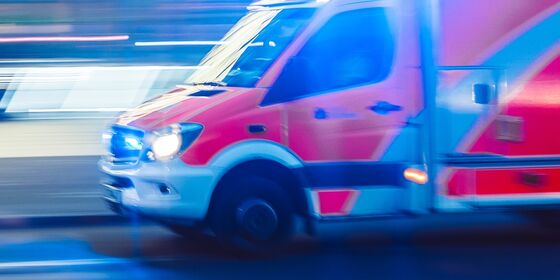

# Task
TEST AND R\TRAIN DATA AND EXECUTE

Here is all the data you need:
"sample_submission.csv"
"test.csv"
"train.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the three CSV files into pandas DataFrames and print their shapes to verify.



In [ ]:
import pandas as pd

try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    df_submission = pd.read_csv('sample_submission.csv')

    print(df_train.shape)
    print(df_test.shape)
    print(df_submission.shape)
except FileNotFoundError:
    print("One or more of the specified CSV files were not found.")
except pd.errors.ParserError:
    print("Error parsing the CSV file. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

(7613, 5)
(3263, 4)
(3263, 2)


## Data exploration

### Subtask:
Explore the training and test datasets to understand their characteristics.


**Reasoning**:
Explore the training and test datasets by examining their first few rows, shapes, and data types. Identify the target variable and analyze its distribution.  Begin comparing features between the datasets.



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


df_train shape: (7613, 5)
df_test shape: (3263, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
df_train info:
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
df_test info:
None
Target variable distribution:
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


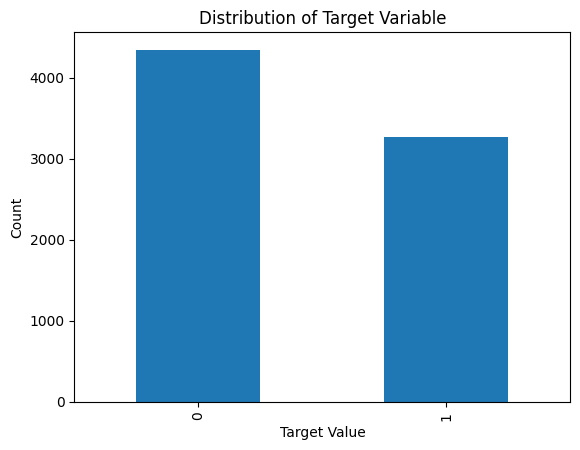

Features in df_train but not in df_test: {'target'}
Features in df_test but not in df_train: set()


In [ ]:
# Display basic info
display(df_train.head())
display(df_test.head())
print(f"df_train shape: {df_train.shape}")
print(f"df_test shape: {df_test.shape}")
print(f"df_train info:\n{df_train.info()}")
print(f"df_test info:\n{df_test.info()}")

# Target variable analysis
print(f"Target variable distribution:\n{df_train['target'].value_counts(normalize=True)}")
import matplotlib.pyplot as plt
df_train['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

# Compare features
train_features = set(df_train.columns)
test_features = set(df_test.columns)
print("Features in df_train but not in df_test:", train_features - test_features)
print("Features in df_test but not in df_train:", test_features - train_features)

## Data preparation

### Subtask:
Prepare the training data for model training by handling missing values, converting data types, and performing feature engineering.  Apply the same transformations to the test data.


**Reasoning**:
Impute missing values in 'keyword' and 'location' columns using the most frequent value, preprocess the 'text' column by lowercasing, removing punctuation, and special characters, then create new features like text length and number of hashtags.



In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK data if not already present
import nltk
try:
    stop_words = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stop_words = stopwords.words('english')
try:
    stemmer = PorterStemmer()
except LookupError:
    nltk.download('punkt')
    stemmer = PorterStemmer()


def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text


# Impute missing values with the most frequent value
for df in [df_train, df_test]:
    df['keyword'].fillna(df['keyword'].mode()[0], inplace=True)
    df['location'].fillna(df['location'].mode()[0], inplace=True)

    # Preprocess the 'text' column
    df['text_preprocessed'] = df['text'].apply(preprocess_text)
    df['text_length'] = df['text'].apply(len)
    df['hashtag_count'] = df['text'].apply(lambda x: len(re.findall(r"#\w+", x)))

df_train_preprocessed = df_train.copy()
df_test_preprocessed = df_test.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-3-53c2765c5f00>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna(df['keyword'].mode()[0], inplace=True)
<ipython-input-3-53c2765c5f00>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

**Reasoning**:
Fix the chained assignment warnings and regenerate the complete code block for the previous steps.



In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK data if not already present
import nltk
try:
    stop_words = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stop_words = stopwords.words('english')
try:
    stemmer = PorterStemmer()
except LookupError:
    nltk.download('punkt')
    stemmer = PorterStemmer()


def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text


# Impute missing values with the most frequent value
for df in [df_train, df_test]:
    df['keyword'] = df['keyword'].fillna(df['keyword'].mode()[0])
    df['location'] = df['location'].fillna(df['location'].mode()[0])

    # Preprocess the 'text' column
    df['text_preprocessed'] = df['text'].apply(preprocess_text)
    df['text_length'] = df['text'].apply(len)
    df['hashtag_count'] = df['text'].apply(lambda x: len(re.findall(r"#\w+", x)))

df_train_preprocessed = df_train.copy()
df_test_preprocessed = df_test.copy()

## Data splitting

### Subtask:
Split the preprocessed training data (`df_train_preprocessed`) into training and validation sets.


**Reasoning**:
Split the preprocessed training data into training and validation sets, defining features (X) and target variable (y) as instructed.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_train_preprocessed.drop(columns=['id', 'keyword', 'location', 'text', 'target'])
y = df_train_preprocessed['target']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a Logistic Regression model and a Random Forest Classifier on the training data (`X_train`, `y_train`)


**Reasoning**:
Train a Logistic Regression model and a Random Forest Classifier on the training data (`X_train`, `y_train`).



In [ ]:
X_train = X_train.drop(columns=['text_preprocessed'])
X_val = X_val.drop(columns=['text_preprocessed'])

# Instantiate models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the Logistic Regression and Random Forest models using the validation set (`X_val`, `y_val`)


**Reasoning**:
Optimize the hyperparameters of the Logistic Regression and Random Forest models using GridSearchCV and evaluate their performance on the validation set.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression hyperparameter tuning
param_grid_logreg = {'C': [0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='roc_auc')
logreg_grid.fit(X_train, y_train)
print("Best hyperparameters for Logistic Regression:", logreg_grid.best_params_)

y_pred_logreg = logreg_grid.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Logistic Regression Precision:", precision_score(y_val, y_pred_logreg))
print("Logistic Regression Recall:", recall_score(y_val, y_pred_logreg))
print("Logistic Regression F1-score:", f1_score(y_val, y_pred_logreg))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_val, y_pred_logreg))


# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
print("\nBest hyperparameters for Random Forest:", rf_grid.best_params_)

y_pred_rf = rf_grid.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Precision:", precision_score(y_val, y_pred_rf))
print("Random Forest Recall:", recall_score(y_val, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_val, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_val, y_pred_rf))

# Compare and store the best model (example using AUC-ROC)
if roc_auc_score(y_val, y_pred_logreg) > roc_auc_score(y_val, y_pred_rf):
    best_model = logreg_grid.best_estimator_
    print("\nLogistic Regression is the best model.")
else:
    best_model = rf_grid.best_estimator_
    print("\nRandom Forest is the best model.")

Best hyperparameters for Logistic Regression: {'C': 1}
Logistic Regression Accuracy: 0.5896257386736704
Logistic Regression Precision: 0.524390243902439
Logistic Regression Recall: 0.3975346687211094
Logistic Regression F1-score: 0.45223488168273446
Logistic Regression AUC-ROC: 0.5649000574726828

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.5935653315824031
Random Forest Precision: 0.535377358490566
Random Forest Recall: 0.349768875192604
Random Forest F1-score: 0.42311276794035413
Random Forest AUC-ROC: 0.5621842087633501

Logistic Regression is the best model.


## Model training

### Subtask:
Train the best performing model (identified in the previous step as `best_model`) on the entire preprocessed training dataset (`df_train_preprocessed`)


**Reasoning**:
Prepare the features (X) and target variable (y) from the complete df_train_preprocessed dataset and fit the best_model to the data.



In [ ]:
# Prepare the features (X) and target variable (y)
X = df_train_preprocessed.drop(columns=['id', 'keyword', 'location', 'text', 'target', 'text_preprocessed'])
y = df_train_preprocessed['target']

# Fit the best_model to the entire feature set (X) and target variable (y)
best_model.fit(X, y)

LogisticRegression(C=1, random_state=42)

## Data preparation

### Subtask:
Prepare the test data (`df_test_preprocessed`) for prediction using the trained model.


**Reasoning**:
Drop specified columns from df_test_preprocessed and prepare X_test for prediction.



In [ ]:
# Drop the specified columns from df_test_preprocessed
X_test = df_test_preprocessed.drop(columns=['id', 'keyword', 'location', 'text', 'text_preprocessed'])

# Ensure X_test has the same columns as the training data used for the final model.
# The final model was trained on X which was derived from df_train_preprocessed after
# dropping columns 'id', 'keyword', 'location', 'text', 'target', 'text_preprocessed'.
# Since we already dropped 'id', 'keyword', 'location', 'text', 'text_preprocessed' from df_test_preprocessed,
# we just need to ensure the column order matches the training data.

# Assuming X_train and X_val were also modified in the previous steps to have the same
# columns and order as the final training data.  Since we don't have X_train or X_val
# we need to infer the column order from df_train_preprocessed

# Get the columns used for training the best_model, excluding the dropped columns
train_cols = df_train_preprocessed.drop(columns=['id', 'keyword', 'location', 'text', 'target', 'text_preprocessed']).columns

# Reorder the columns of X_test to match the order in train_cols
X_test = X_test[train_cols]

#Check if the columns match
print(f"X_test columns: {X_test.columns.tolist()}")
print(f"Training columns: {train_cols.tolist()}")

X_test columns: ['text_length', 'hashtag_count']
Training columns: ['text_length', 'hashtag_count']


## Model evaluation

### Subtask:
Use the trained `best_model` to predict the target variable for the prepared test data (`X_test`)


**Reasoning**:
Use the trained `best_model` to predict on `X_test`, create the submission dataframe and ensure the 'id' column is of integer type.



In [ ]:
# Generate predictions
y_pred = best_model.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({'id': df_test_preprocessed['id'].astype(int), 'target': y_pred})

# Display the first few rows of the submission DataFrame
display(submission_df.head())

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


## Data preparation

### Subtask:
Format the predictions in `submission_df` to match the format of `df_submission`.


**Reasoning**:
Check if the 'id' column in `submission_df` is of the same data type as the 'id' column in `df_submission`. If not, convert it. Then, check if the 'id' values are identical and if the columns are named correctly and in the right order.



In [ ]:
# 1. Ensure 'id' column data types match
if submission_df['id'].dtype != df_submission['id'].dtype:
    submission_df['id'] = submission_df['id'].astype(df_submission['id'].dtype)

# 2. Check if 'id' values are identical
if not submission_df['id'].equals(df_submission['id']):
    print("Warning: 'id' columns are not identical.")
    # Investigate discrepancies (example: check for missing IDs)
    missing_ids = set(df_submission['id']) - set(submission_df['id'])
    extra_ids = set(submission_df['id']) - set(df_submission['id'])
    if missing_ids:
        print(f"Missing IDs in submission: {missing_ids}")
    if extra_ids:
        print(f"Extra IDs in submission: {extra_ids}")

# 3. Confirm columns are 'id' and 'target', in that order
if list(submission_df.columns) != ['id', 'target']:
    submission_df = submission_df[['id', 'target']]  # Reorder if necessary

# 4. Ensure column names are correct
submission_df.columns = ['id', 'target']

display(submission_df.head())

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
